In [62]:
import geopandas as gpd
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import numpy as np

ImportError: cannot import name 'train_test_split' from 'sklearn' (c:\Python39\lib\site-packages\sklearn\__init__.py)

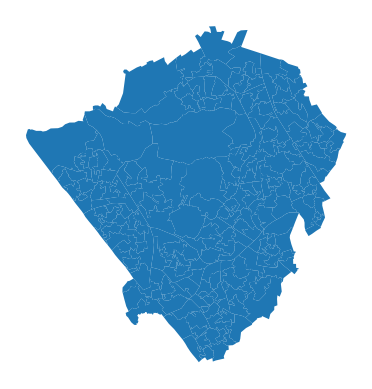

In [3]:
# Read in the data
shape = gpd.read_file(r"DC2Data/LSOAShapes/LSOA_2011_London_gen_MHW_LSOA11NM_contains_Barnet.shp")
ax = shape.plot()
ax.set_axis_off()

In [4]:
burglaries = pd.read_csv(r"DC2Data/burglary.csv")
list1 = list(shape['LSOA11CD'])
list2 = list(burglaries['LSOA code'].unique())

for i in list1:
    if i not in list2:
        print(i)


In [5]:
counts =  burglaries.groupby('LSOA code').size()
counts = counts.to_frame()
counts.columns = ['count']
counts = counts.reset_index()
counts = counts.rename(columns={'LSOA code':'LSOA11CD'})
shape = shape.merge(counts, on='LSOA11CD')

<AxesSubplot: >

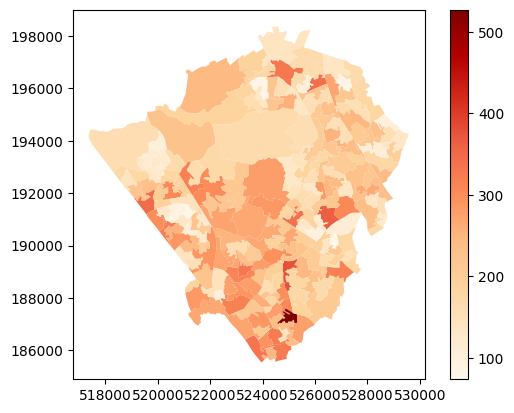

In [7]:
shape.plot(column='count', cmap='OrRd', legend=True)

In [8]:
burglaries.head()

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,7,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.201877,51.655538,On or near High Street,E01000248,Barnet 001A,Burglary,NaN,NaN
1,8,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.207853,51.654317,On or near The Avenue,E01000248,Barnet 001A,Burglary,NaN,NaN
2,9,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.202510,51.656348,On or near Bruce Road,E01000248,Barnet 001A,Burglary,NaN,NaN
3,10,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.206779,51.654768,On or near The Drive,E01000248,Barnet 001A,Burglary,NaN,NaN
4,27,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.209537,51.655223,On or near Marriott Road,E01000249,Barnet 001B,Burglary,NaN,NaN


In [9]:
outcomes_df = pd.read_csv('DC2Data/outcomes.csv')
outcomes_df['year'] = outcomes_df['Month'].str[0:4]
outcomes_df['Month'] = outcomes_df['Month'].str[5:7]
outcomes_df['source'] = 'outcomes'
outcomes_df['year'].unique()

array(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023'], dtype=object)

In [10]:
burglaries['year'] = burglaries['Month'].str[:4]
burglaries_2 = burglaries.copy()
burglaries_2['Month'] = burglaries['Month'].str[5:7]
burglaries_2['source'] = 'burglaries'
burglaries_2['year'].unique()



array(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'], dtype=object)

Text(0.5, 1.0, 'Number of outcomes per month')

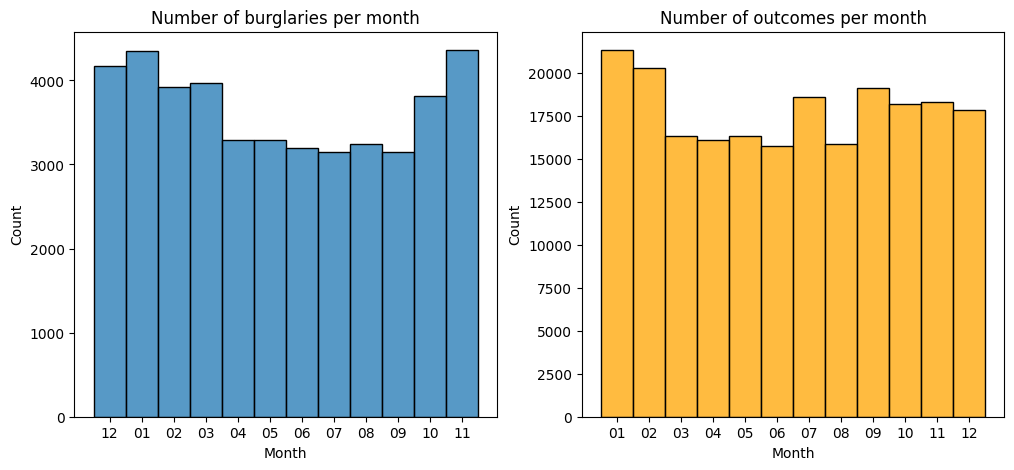

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=burglaries_2, x='Month', ax=ax[0])
sns.histplot(data= outcomes_df, x='Month', ax=ax[1], color='orange')

ax[0].set_title('Number of burglaries per month')
ax[1].set_title('Number of outcomes per month')


In [25]:
#grouping the data per LSOA

df_burglaries = burglaries_2.copy()

df_burglaries['Number of burglaries'] = 1

df_burglaries_grouped = df_burglaries.groupby('LSOA name')

df_burglaries_grouped.head()



C:\Users\20202719\AppData\Local\Temp\ipykernel_37236\1880519802.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_burglaries_grouped = df_burglaries.groupby('LSOA name').sum()


,Unnamed: 0,Longitude,Latitude,Context,Number of burglaries
LSOA name,,,,,
Barnet 001A,30245661,-36.116895,9091.339628,0.0,176
Barnet 001B,29974145,-40.546133,9814.611726,0.0,190
Barnet 001C,66217061,-65.287361,16994.293901,0.0,329
Barnet 001D,23736671,-28.632183,7335.975644,0.0,142
Barnet 001E,40797678,-44.406782,11259.434933,0.0,218


<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

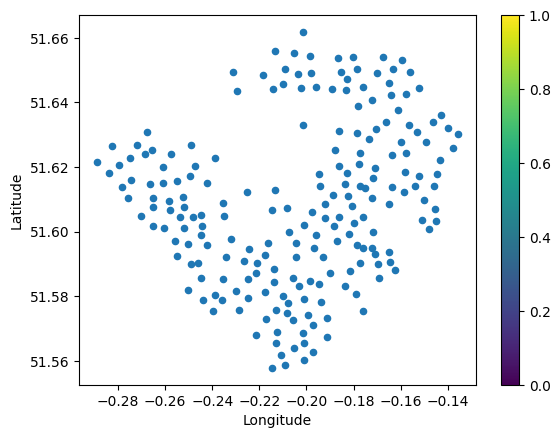

In [24]:
df_burglaries_grouped.plot(kind='scatter', x='Longitude', y='Latitude', colorbar='Number of burglaries')

In [32]:
df_LSOA = pd.read_excel('lsoa-data.xlsx', header=[0,1,2])

In [51]:
df_LSOA_Barnet = df_LSOA[df_LSOA['Unnamed: 1_level_0']['Unnamed: 1_level_1']['Names'].str.contains('Barnet')]

df_LSOA_Barnet.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Mid-year Population Estimates  \
     Unnamed: 0_level_1 Unnamed: 1_level_1                      All Ages   
                  Codes              Names                          2001   
2005          E01000248        Barnet 001A                          1510   
2006          E01000249        Barnet 001B                          1529   
2007          E01000250        Barnet 001C                          1620   
2008          E01000254        Barnet 001D                          1450   
2009          E01000292        Barnet 001E                          1504   

                                                ...     House Prices          \
                                                ... Median Price (£)           
      2002  2003  2004  2005  2006  2007  2008  ...             2011    2012   
2005  1481  1507  1481  1496  1469  1540  1583  ...           320000  420000   
2006  1502  1491  1461  1512  1526  1505  1517  ...           489000  500000   
2007  1697  1696  1716  1802  1830  1860  1978  ...           327500  267500   
2008  1438  1463  1493  1502  1497  1516  1498  ...           406250  480000   
2009  1467  1448  1433  1449  1451  1512  1525  ...           295000  350000   

                                                     
                     Sales                           
        2013    2014  2009 2010 2011 2012 2013 2014  
2005  369950  395000    16   25   24   27   29   37  
2006  541000  540000    16   19   15   23   16   28  
2007  272500  395000    28   55   36   47   54   41  
2008  423500  460500    20   30   20   24   28   38  
2009  300000  339950    18   23   22   19   26   29  

[5 rows x 185 columns]

In [75]:
price_list = df_LSOA_Barnet['House Prices']['Median Price (£)'][2014].tolist()
df_burglaries_grouped['Median house price'] = price_list


In [76]:
pop_list = df_LSOA_Barnet['2011 Census Population']['Age Structure']['All Ages'].tolist()

df_burglaries_grouped['population'] = pop_list

df_burglaries_grouped.head()

,Unnamed: 0,Longitude,Latitude,Context,Number of burglaries,population,Median house price
LSOA name,,,,,,,
Barnet 001A,30245661,-36.116895,9091.339628,0.0,176,1661,395000.0
Barnet 001B,29974145,-40.546133,9814.611726,0.0,190,1525,540000.0
Barnet 001C,66217061,-65.287361,16994.293901,0.0,329,2232,395000.0
Barnet 001D,23736671,-28.632183,7335.975644,0.0,142,1549,460500.0
Barnet 001E,40797678,-44.406782,11259.434933,0.0,218,1467,339950.0


<AxesSubplot: xlabel='population', ylabel='Number of burglaries'>

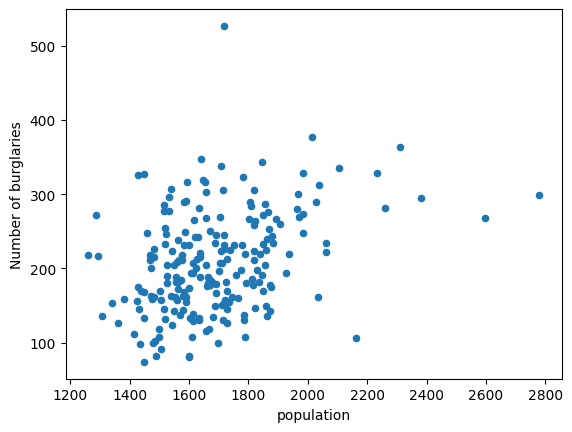

In [60]:
df_burglaries_grouped.plot(kind='scatter', x='population', y='Number of burglaries')

<AxesSubplot: xlabel='Median house price', ylabel='Number of burglaries'>

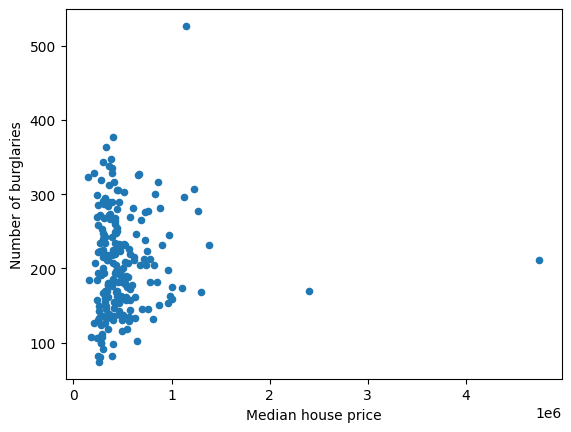

In [77]:
df_burglaries_grouped.plot(kind='scatter', x='Median house price', y='Number of burglaries')

Text(0.5, 1.0, 'Population vs Number of Burglaries')

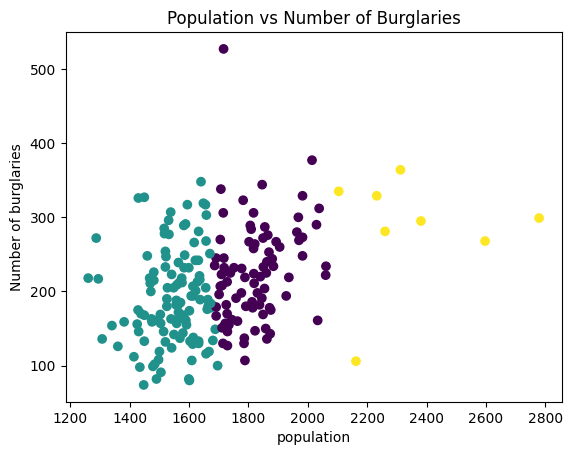

In [93]:
#Population vs nr burglaries

kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')

fit_data = df_burglaries_grouped[['population', 'Number of burglaries']]


labels = kmeans.fit_predict(fit_data)

plt.scatter(fit_data['population'], fit_data['Number of burglaries'], c=labels, cmap='viridis')
plt.xlabel('population')
plt.ylabel('Number of burglaries')
plt.title('Population vs Number of Burglaries')

Text(0.5, 1.0, 'House prices vs Number of burglaries')

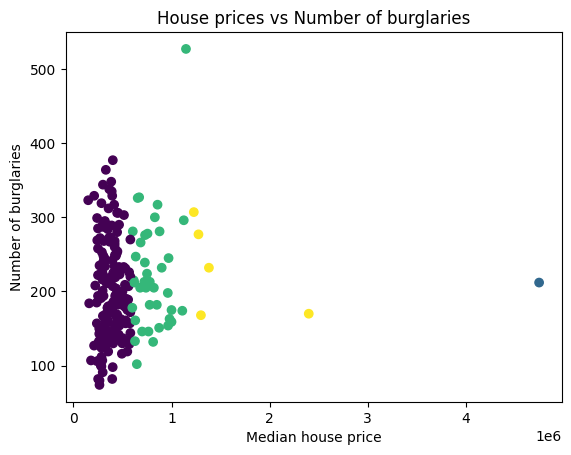

In [94]:
#House prices vs nr of burglaries

kmeans2 = KMeans(n_clusters=4, random_state=0, n_init='auto')

fit_data_prices = df_burglaries_grouped[['Median house price', 'Number of burglaries']]

labels2 = kmeans2.fit_predict(fit_data_prices)

plt.scatter(fit_data_prices['Median house price'], fit_data_prices['Number of burglaries'], c=labels2)
plt.xlabel('Median house price')
plt.ylabel('Number of burglaries')
plt.title('House prices vs Number of burglaries')